In [3]:
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin1')  # or 'ISO-8859-1'


In [5]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)


v1                                                 v2 Unnamed: 2  \
1270  ham  Sorry chikku, my cell got some problem thts y ...        NaN   
5372  ham     Ok., is any problem to u frm him? Wats matter?        NaN   
3704  ham    Ok. Very good. Its all about making that money.        NaN   
669   ham                              Did u receive my msg?        NaN   
1867  ham  Mmmm ... Fuck ... Not fair ! You know my weakn...        NaN   

     Unnamed: 3 Unnamed: 4  
1270        NaN        NaN  
5372        NaN        NaN  
3704        NaN        NaN  
669         NaN        NaN  
1867        NaN        NaN

In [6]:
df.shape

(5572, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

v1                                                 v2
5103   ham  In other news after hassling me to get him wee...
5531   ham  Compliments to you. Was away from the system. ...
4725   ham  Jason says it's cool if we pick some up from h...
5430   ham  If you can make it any time tonight or wheneve...
2159  spam  FREE for 1st week! No1 Nokia tone 4 ur mob eve...

In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
1726    ham  \ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...
3489    ham  Huh but i got lesson at 4 lei n i was thinkin ...
49      ham  U don't know how stubborn I am. I didn't even ...
1273   spam  network operator. The service is free. For T &...
3928    ham                            Yes. Nigh you cant aha.

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

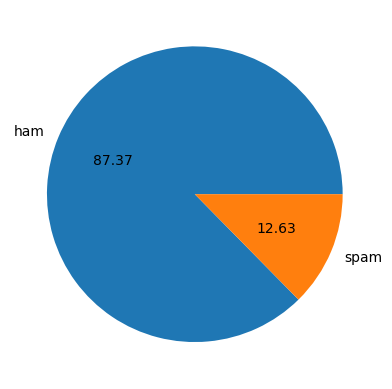

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91977\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [31]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

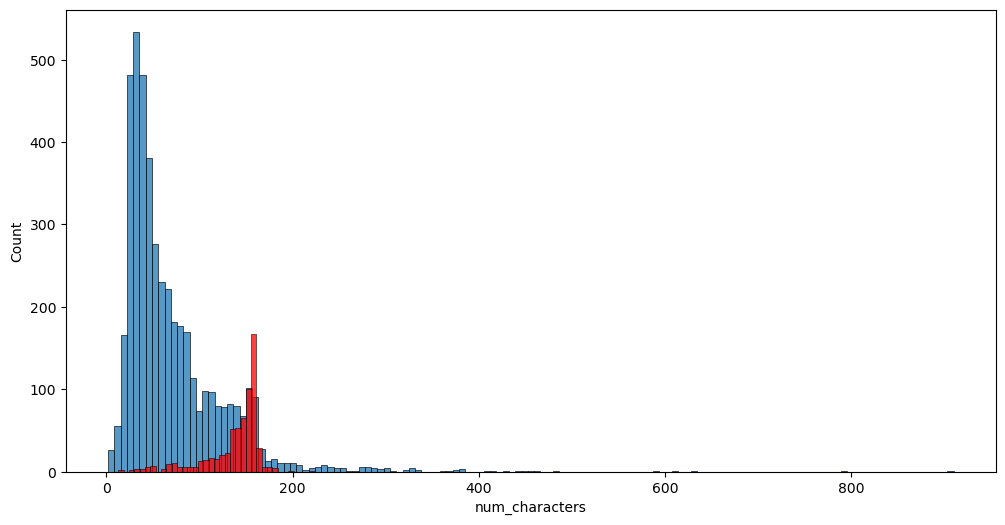

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

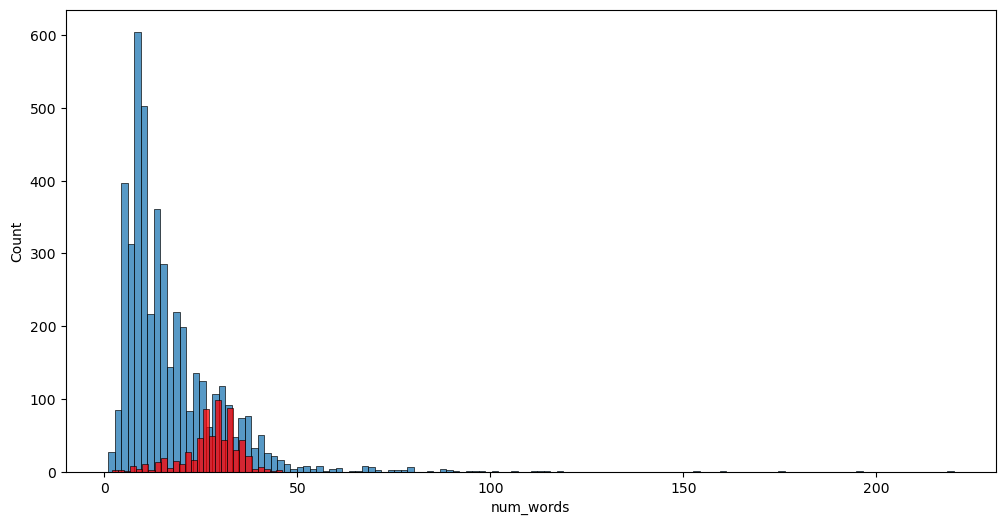

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

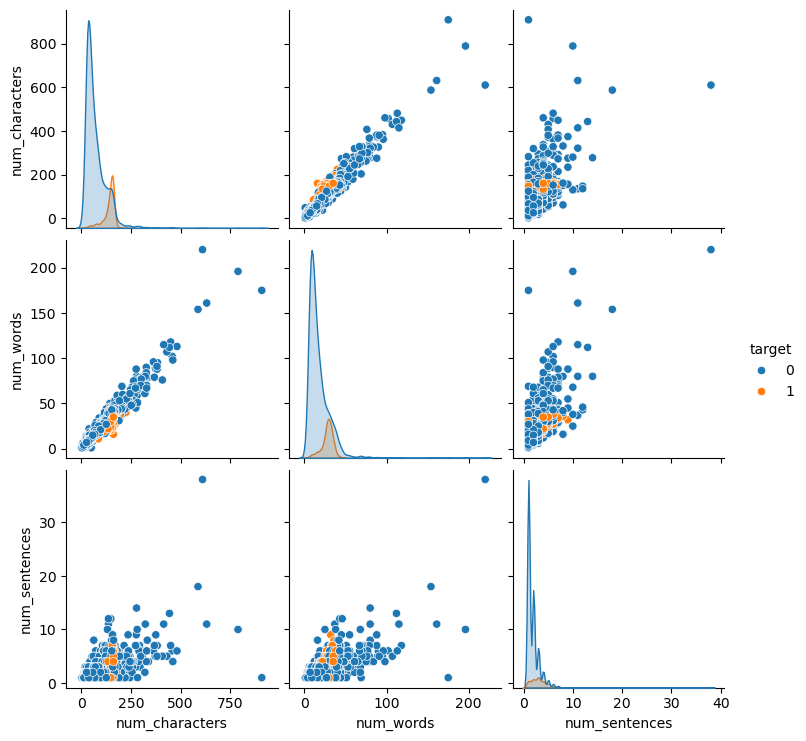

In [37]:
sns.pairplot(df,hue='target')

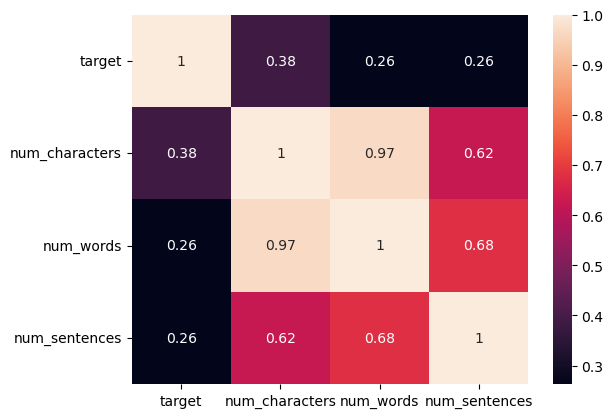

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()


In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [40]:
# Step 1: Imports and downloads
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # Required for nltk.word_tokenize
from nltk.corpus import stopwords
import string

# Step 2: Define the function
def transform_text(text):
    y = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return " ".join(y)

# Step 3: Test the function
print(transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."))


'm gon na home soon n't want talk stuff anymore tonight k 've cried enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91977\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91977\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazy .. available bugis n gre...  
1          8              2                    ok lar ... joking wif u oni ...  
2         37              2  free entry 2 wkly comp win fa cup final tkts 2...  
3         13              1        u dun say early hor ... u c already say ...  
4         15              1         nah n't think goes usf lives around though

In [45]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

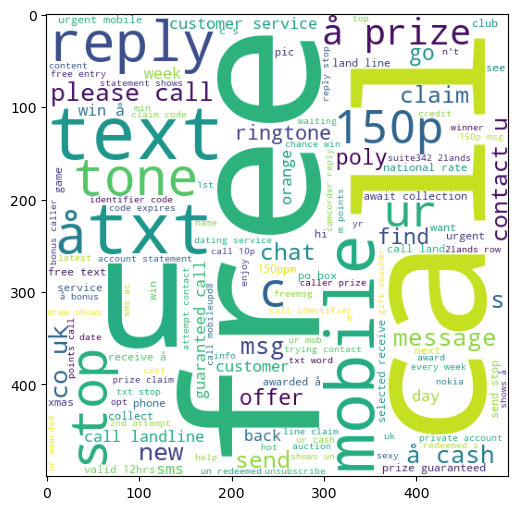

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

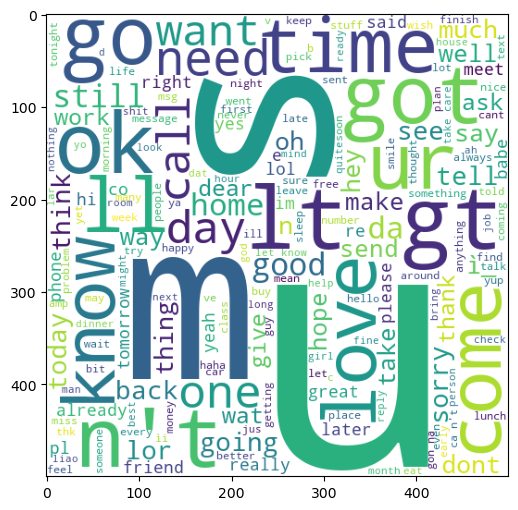

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazy .. available bugis n gre...  
1          8              2                    ok lar ... joking wif u oni ...  
2         37              2  free entry 2 wkly comp win fa cup final tkts 2...  
3         13              1        u dun say early hor ... u c already say ...  
4         15              1         nah n't think goes usf lives around though

In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [53]:
len(spam_corpus)

11083

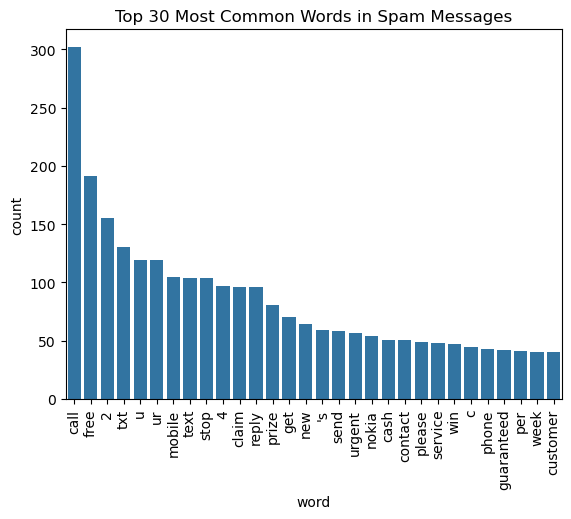

In [54]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume spam_corpus is a list of words
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()


In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

39894

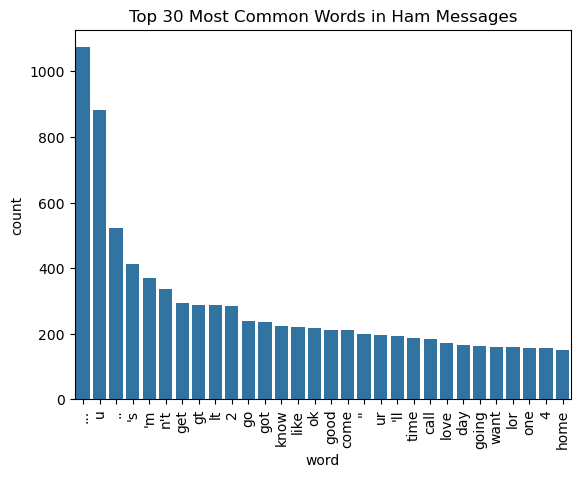

In [57]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from Counter of most common words
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot using keyword arguments
sns.barplot(x='word', y='count', data=common_words)

# Rotate x-axis labels
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages")
plt.show()


In [58]:
# Text Vectorization
# using Bag of Words
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazy .. available bugis n gre...  
1          8              2                    ok lar ... joking wif u oni ...  
2         37              2  free entry 2 wkly comp win fa cup final tkts 2...  
3         13              1        u dun say early hor ... u c already say ...  
4         15              1         nah n't think goes usf lives around though

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8849129593810445
[[799  97]
 [ 22 116]]
0.5446009389671361


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.988394584139265
[[896   0]
 [ 12 126]]
1.0


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
# !pip install xgboost


In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.941972920696325
Precision -  0.8823529411764706
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9595959595959596
For  RF
Accuracy -  0.9709864603481625
Precision -  0.990909090909091


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.981651376146789
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.875
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [78]:
performance_df

Algorithm  Accuracy  Precision
1         KN  0.906190   1.000000
2         NB  0.976789   1.000000
5         RF  0.970986   0.990909
8        ETC  0.980658   0.983607
10       xgb  0.975822   0.982906
6   AdaBoost  0.968085   0.981651
0        SVC  0.976789   0.975000
4         LR  0.954545   0.959596
9       GBDT  0.952611   0.923810
3         DT  0.941973   0.882353
7        BgC  0.959381   0.875000

In [79]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [80]:
performance_df1

Algorithm   variable     value
0         KN   Accuracy  0.906190
1         NB   Accuracy  0.976789
2         RF   Accuracy  0.970986
3        ETC   Accuracy  0.980658
4        xgb   Accuracy  0.975822
5   AdaBoost   Accuracy  0.968085
6        SVC   Accuracy  0.976789
7         LR   Accuracy  0.954545
8       GBDT   Accuracy  0.952611
9         DT   Accuracy  0.941973
10       BgC   Accuracy  0.959381
11        KN  Precision  1.000000
12        NB  Precision  1.000000
13        RF  Precision  0.990909
14       ETC  Precision  0.983607
15       xgb  Precision  0.982906
16  AdaBoost  Precision  0.981651
17       SVC  Precision  0.975000
18        LR  Precision  0.959596
19      GBDT  Precision  0.923810
20        DT  Precision  0.882353
21       BgC  Precision  0.875000

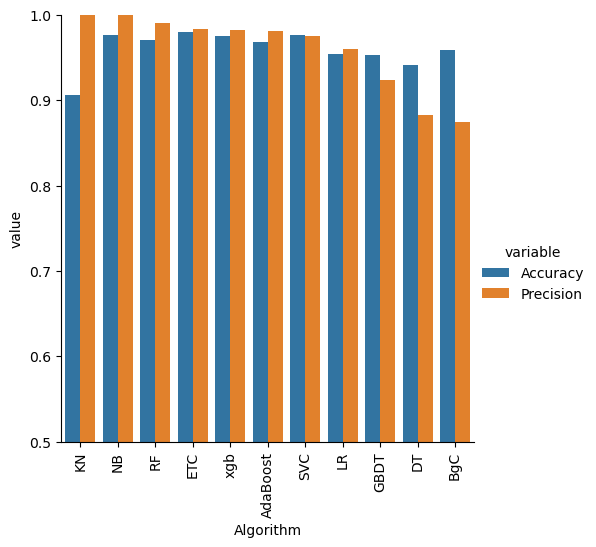

In [81]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [84]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [85]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [87]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0         KN  0.906190   1.000000            0.906190             1.000000   
1         NB  0.976789   1.000000            0.976789             1.000000   
2         RF  0.970986   0.990909            0.970986             0.990909   
3        ETC  0.980658   0.983607            0.980658             0.983607   
4        xgb  0.975822   0.982906            0.975822             0.982906   
5   AdaBoost  0.968085   0.981651            0.968085             0.981651   
6        SVC  0.976789   0.975000            0.976789             0.975000   
7         LR  0.954545   0.959596            0.954545             0.959596   
8       GBDT  0.952611   0.923810            0.952611             0.923810   
9         DT  0.941973   0.882353            0.941973             0.882353   
10       BgC  0.959381   0.875000            0.959381             0.875000   

    Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0             0.906190             1.000000            0.906190   
1             0.976789             1.000000            0.976789   
2             0.970986             0.990909            0.970986   
3             0.980658             0.983607            0.980658   
4             0.975822             0.982906            0.975822   
5             0.968085             0.981651            0.968085   
6             0.976789             0.975000            0.976789   
7             0.954545             0.959596            0.954545   
8             0.952611             0.923810            0.952611   
9             0.941973             0.882353            0.941973   
10            0.959381             0.875000            0.959381   

    Precision_num_chars  
0              1.000000  
1              1.000000  
2              0.990909  
3              0.983607  
4              0.982906  
5              0.981651  
6              0.975000  
7              0.959596  
8              0.923810  
9              0.882353  
10             0.875000

In [88]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [90]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [91]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9838709677419355


In [92]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier

In [94]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [95]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.988394584139265
Precision 0.9846153846153847


In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Step 1: Load CSV
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Step 2: Preprocessing
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Model Training
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# Step 6: Evaluation
y_pred = clf.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# Step 7: Test on Custom Input
custom_text = ["Congratulations! You've won a free ticket to Bahamas. Click here to claim."]
custom_vec = vectorizer.transform(custom_text)
custom_pred = clf.predict(custom_vec)

print("Custom Prediction:", "Spam" if custom_pred[0] == 1 else "Ham")


Accuracy: 0.967713004484305
Precision: 0.9913793103448276
Custom Prediction: Spam
